In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
# %matplotlib tk

In [7]:
data_folder = "data"

In [8]:
df = pd.read_csv(os.path.join(data_folder, 'ident_wheels_sim_0.1.csv'),header=None, names=['wheel_l','wheel_r','beta_l','beta_r','alpha'])
df = df[(df.wheel_l >= 1) & (df.wheel_r >= 2)]
df = df[(df.wheel_l <= 11) & (df.wheel_r <= 11)]

In [9]:
v = (df.wheel_l + df.wheel_r) / 2 * 0.0856
idx_filter = v > 0.01
filtered = df[idx_filter]
filtered

,wheel_l,wheel_r,beta_l,beta_r,alpha
295,1.0870,9.7826,-0.015482,0.067317,-0.315180
296,1.0870,7.6087,-0.028014,0.040003,-0.173690
297,1.0870,5.4348,-0.022680,0.024398,-0.074192
298,1.0870,3.2609,-0.011591,0.011671,-0.012136
487,3.2609,9.7826,-0.020675,0.040317,-0.181540
488,3.2609,7.6087,-0.021537,0.024294,-0.076641
489,3.2609,5.4348,-0.011434,0.011593,-0.017247
490,3.2609,3.2609,0.000021,-0.000015,-0.000018
511,5.4348,9.7826,-0.019607,0.023768,-0.079202
512,5.4348,7.6087,-0.011299,0.011533,-0.018756


In [10]:
omega_l = filtered.wheel_l.values
omega_r = filtered.wheel_r.values
beta_l = filtered.beta_l.values
beta_r = filtered.beta_r.values
alpha = filtered.alpha.values

In [11]:
omega_l_grid, omega_r_grid = np.meshgrid(np.linspace(omega_l.min(), omega_l.max(), 100),
                                                 np.linspace(omega_r.min(), omega_r.max(), 100))

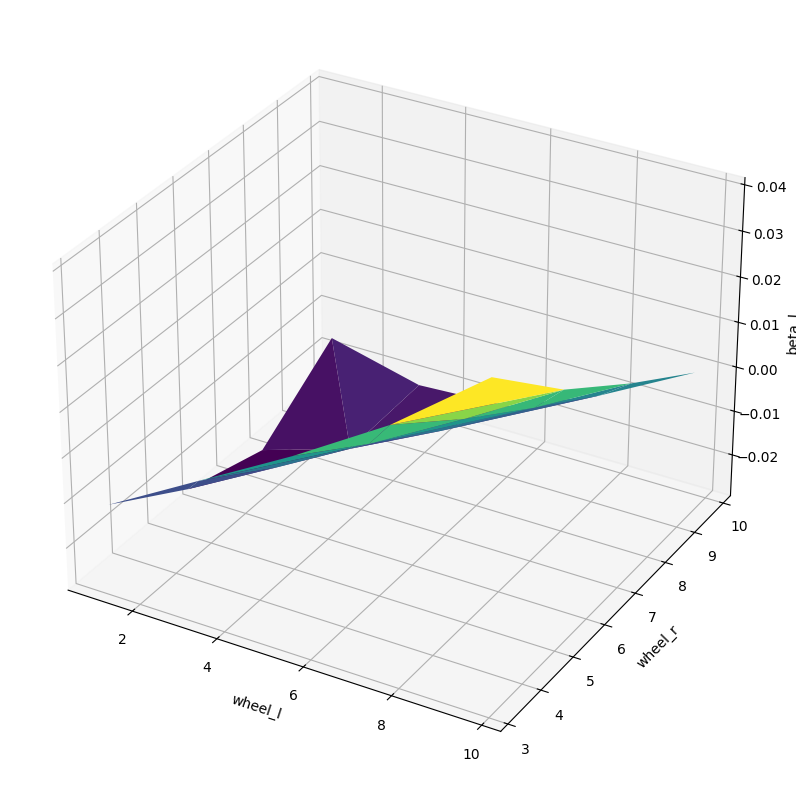

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(omega_l, omega_r, beta_l, cmap='viridis')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
ax.set_zlabel("beta_l")
plt.show()

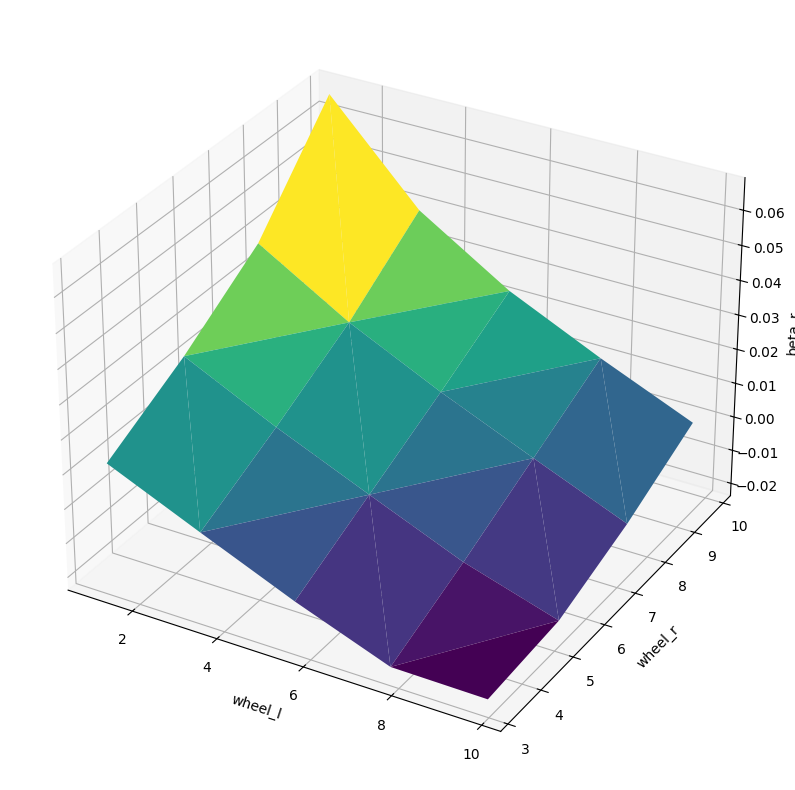

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(omega_l, omega_r, beta_r, cmap='viridis')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
ax.set_zlabel("beta_r")
plt.show()

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(omega_l, omega_r, alpha, cmap='viridis')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
ax.set_zlabel("alpha")
plt.show()

In [19]:
filtered.to_csv(f"{data_folder}/1.csv")